In [1]:
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install scikit-learn
#pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('BBDD.xlsx')

In [3]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [4]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [5]:
#filtrado en español
df = df[['sentimiento', 'review_es']].copy()

In [6]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

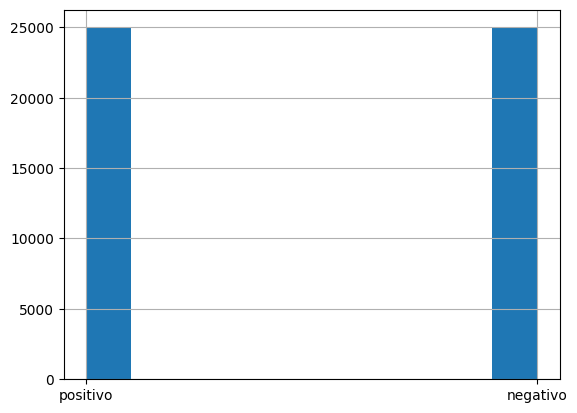

In [7]:
#histograma de sentiminetos de BD
df['sentimiento'].hist()

In [8]:
#etiqueta enumerdad para sentiminto
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [9]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [10]:
#definir y dividir datos de prueba y datos de entrenamiento
df_train, df_test = train_test_split(df)

In [11]:
#75%
df_train

,sentimiento,review_es,target
3864,negativo,The old man mouse in this cartoon would have y...,0
31733,positivo,"Stan Laurel, se ha observado, primero hizo un ...",1
36059,positivo,Razonablemente efectivo horror / ciencia ficci...,1
25453,negativo,Esta es la primera vez que escribo un comentar...,0
34603,negativo,"Primero, la premisa apesta ... a un niño peque...",0
...,...,...,...
34973,negativo,Si no fuera por las actuaciones de Barry Diamo...,0
37388,positivo,Me sentí así cuando vi el episodio en su carre...,1
36728,negativo,"Le daré esto: no dejé de mirar, y no es corpor...",0
11141,positivo,"Amo amo amo este show.Ya sea que digas, es por...",1


In [12]:
#25%
df_test

,sentimiento,review_es,target
48862,negativo,"Cuando un hombre que no tiene, Alzheimer, no p...",0
46849,negativo,Esta es la peor película que he visto.Si no lo...,0
1332,negativo,Aunque soy un fanático de Heather Thomas y ten...,0
21228,negativo,'Ahora estás en la Marina' es dolorosamente ma...,0
49228,positivo,Había escuchado que esta película era buena de...,1
...,...,...,...
2299,positivo,Bela Lugosi se pone a jugar uno de sus roles r...,1
22484,positivo,La trama de esta película se encuentra frente ...,1
23464,negativo,Esta no es la peor película que he visto. No s...,0
23534,negativo,"Cogí esto en HBO bajo su categoría de ""placere...",0


In [13]:
#apluicar funcion vertorizar
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
#vetorizar conjunto de entrenamiento
X_train = vectorizer.fit_transform(df_train['review_es'])

In [15]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3460647 stored elements in Compressed Sparse Row format>

In [16]:
#hacer lo mismo con test
X_test = vectorizer.transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1158198 stored elements in Compressed Sparse Row format>

In [17]:
#guardar datos de target en varaibles para entrenamiento y test
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
#modelo con regrecion logistica con cantidad de interacciones
model = LogisticRegression(max_iter=1000)
#entranar modelo
model.fit(X_train, Y_train)
#imprimir precicion de datos de prueba y datos de entrenamiento}
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8801066666666667
Test acc: 0.86192


In [19]:
#corre modleo para matriz de confuncion
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [20]:
#matriz
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.86891885, 0.13108115],
       [0.10868521, 0.89131479]])

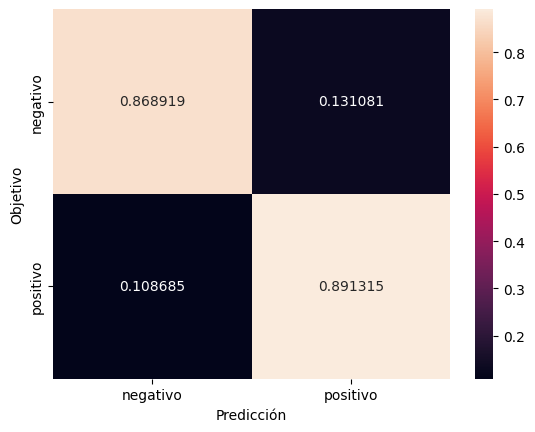

In [21]:
#graficar modelo de confucion train
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

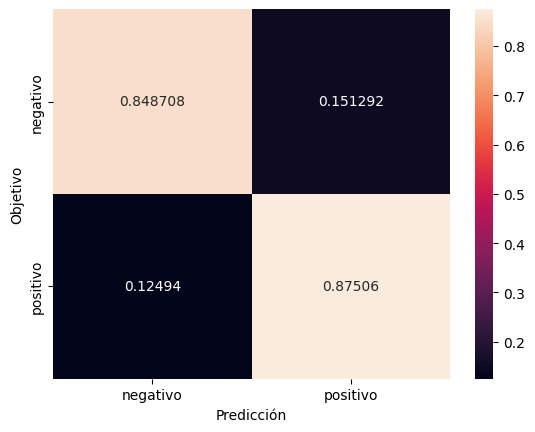

In [23]:
#graficar modelo de confucion train test
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [25]:
#mapeo de palabras
word_index_map = vectorizer.vocabulary_
word_index_map

{'the': 1788,
 'old': 1304,
 'man': 1108,
 'in': 944,
 'this': 1797,
 'would': 1978,
 'have': 862,
 'you': 1984,
 'that': 1787,
 'all': 75,
 'are': 128,
 'if': 926,
 'we': 1962,
 'to': 1815,
 'just': 1017,
 'as': 137,
 'bad': 170,
 'was': 1958,
 'don': 540,
 'it': 986,
 'and': 102,
 'makes': 1100,
 'then': 1791,
 'now': 1268,
 'se': 1615,
 'ha': 833,
 'primero': 1456,
 'hizo': 894,
 'un': 1868,
 'verdadero': 1910,
 'nombre': 1255,
 'para': 1337,
 'sí': 1743,
 'mismo': 1174,
 'en': 585,
 'de': 440,
 'la': 1025,
 'década': 554,
 'ciertamente': 301,
 'demuestra': 463,
 'ser': 1644,
 'excelente': 711,
 'actor': 34,
 'cómico': 427,
 'artista': 136,
 'aquí': 127,
 'una': 1869,
 'parodia': 1346,
 'sangre': 1609,
 'pero': 1387,
 'creo': 397,
 'que': 1510,
 'película': 1365,
 'como': 339,
 'esta': 667,
 'realmente': 1539,
 'funciona': 787,
 'no': 1252,
 'porque': 1437,
 'era': 618,
 'gran': 819,
 'permite': 1386,
 'audiencia': 156,
 'comedia': 329,
 'ya': 1980,
 'con': 352,
 'situación': 1685,


In [26]:
#palabras mas psotivas usando coef
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
excelente 7.96623453492374
mejores 4.17929323669496
recomiendo 4.015510244473082
maravillosa 4.324078834329892
brillante 4.099449966899863
increíble 4.239696130173196
excelentes 4.016634054431306
perfecto 4.354278308604968
hoy 4.2177142047213625
disfruté 4.357874527263691
hilarante 4.240736660783234
definitivamente 4.586513414658124
genial 4.167804698763673
encantó 5.057895565106949


In [27]:
#palbras mas negativas
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.5205538799627485
horrible -9.061649047453905
mala -7.699346202678843
peor -10.187026125898289
nada -4.022420907190954
mal -5.885481785326558
terrible -7.782791306801474
peores -7.325281345311394
basura -5.1764048466065775
pobre -5.661024759747881
aburrido -6.761568449439092
decepción -4.972953685161127
débil -4.184004427212926
minutos -4.089283272166944
desafortunadamente -4.6112139492799455
aburrida -6.141890008796849
mierda -4.163039156412843
decepcionante -4.6685460571872435


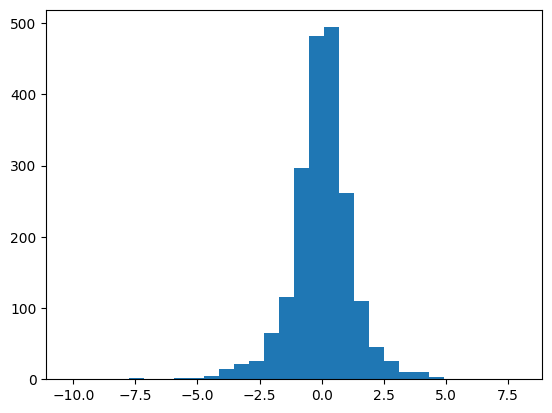

In [30]:
#histograma de palabras y peso
plt.hist(model.coef_[0], bins=30);

In [31]:
#test dek modelo
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)

In [32]:
# Predecir con el modelo
P = model.predict(x)

In [33]:
# Obtener las clases del modelo
clases = model.classes_

In [34]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo


In [35]:
#multiclase
df = pd.read_csv('Twitter_Data.csv')

In [36]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

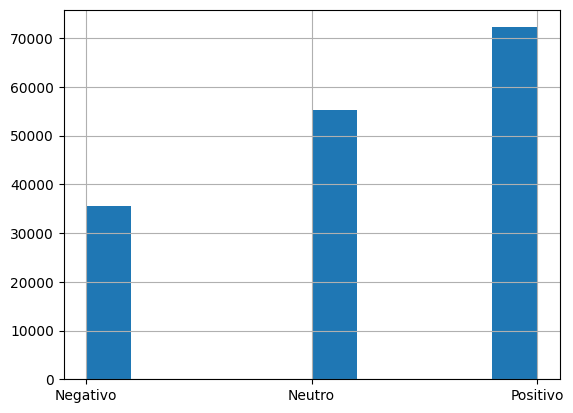

In [37]:
df['category'].hist()

In [38]:
#etiqueta y enumeracion
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [39]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [40]:
#divicion de datos para test y train
df_train, df_test = train_test_split(df)

In [41]:
df_train.head()

,clean_text,category,target
116903,nightwatchman has now become derogatory term a...,Neutro,2
74731,view straight and simple modi will not leave y...,Positivo,1
70239,modi means matured only one diplomatic indian,Neutro,2
32228,thanks for the blessings but don’ worry wouldn...,Positivo,1
515,former odisha dgp prakash mishra joins bjp and...,Positivo,1


In [42]:
df_train

,clean_text,category,target
116903,nightwatchman has now become derogatory term a...,Neutro,2
74731,view straight and simple modi will not leave y...,Positivo,1
70239,modi means matured only one diplomatic indian,Neutro,2
32228,thanks for the blessings but don’ worry wouldn...,Positivo,1
515,former odisha dgp prakash mishra joins bjp and...,Positivo,1
...,...,...,...
142522,modi takes money from ‘mitron’ and gives ‘bhai...,Positivo,1
154593,ive just posted new blog will nirav modi and v...,Positivo,1
31702,what the singular achievement modi made rahul ...,Neutro,2
77326,few intellectuals will cry now that even ameri...,Negativo,0


In [43]:
#vetorizasr datos
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1766184 stored elements in Compressed Sparse Row format>

In [44]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 586481 stored elements in Compressed Sparse Row format>

In [45]:
#definir targets
Y_train = df_train['target']
Y_test = df_test['target']

In [46]:
#entranar modelo con regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8965850146450018
Test acc: 0.8901624858867999


In [47]:
#predecir modelo
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [48]:
#matriz de confucion
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75782692, 0.11976792, 0.12240515],
       [0.03616896, 0.9028994 , 0.06093164],
       [0.00875941, 0.01384083, 0.97739976]])

In [49]:
#plot
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

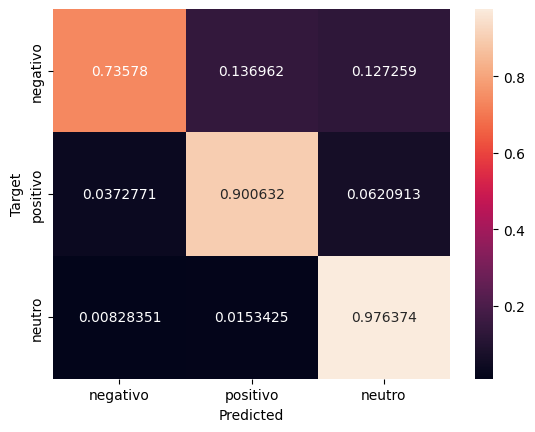

In [51]:
#impirmir matrzi de confucion
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)